## Streaming Viewing Habits

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Setup theme
PALETTE = 'magma'
sns.set_theme(style="white")

plt.rcParams["font.family"] = "monospace"

In [4]:
# Read CSV files in
hulu = pd.read_csv("datasets/HuluViewingHistoryUpdated.csv")
netflix = pd.read_csv("datasets/AshleyViewingActivity.csv")
prime_video = pd.read_csv("datasets/DigitalPrimeVideoViewinghistory.csv")
streaming_data = pd.read_csv("datasets/tv_shows.csv")

data_streaming = pd.read_csv("datasets/titles.csv")

In [5]:
data_streaming.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [6]:
data_streaming.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [7]:
# Drop columns that aren't needed
data_streaming = data_streaming.drop(columns=["id", "type", "description", "production_countries", "seasons", "imdb_id", "imdb_votes", "tmdb_score", "tmdb_popularity"], axis=1)

# View updated df
data_streaming.head()

,title,release_year,age_certification,runtime,genres,imdb_score
0,Five Came Back: The Reference Films,1945,TV-MA,51,['documentation'],NaN
1,Taxi Driver,1976,R,114,"['drama', 'crime']",8.2
2,Deliverance,1972,R,109,"['drama', 'action', 'thriller', 'european']",7.7
3,Monty Python and the Holy Grail,1975,PG,91,"['fantasy', 'action', 'comedy']",8.2
4,The Dirty Dozen,1967,NaN,150,"['war', 'action']",7.7


In [8]:
# Fix the column names in the dataframe
fixed_columns = {
    "title":"Title",
    "release_year":"Release Year",
    "age_certification":"Age Certification",
    "runtime":"Runtime",
    "genres":"Genres",
    "imdb_score":"Imdb Score"
}

# Check column names are displaying correctly
data_streaming.rename(columns=fixed_columns, inplace=True)
data_streaming.head()

,Title,Release Year,Age Certification,Runtime,Genres,Imdb Score
0,Five Came Back: The Reference Films,1945,TV-MA,51,['documentation'],NaN
1,Taxi Driver,1976,R,114,"['drama', 'crime']",8.2
2,Deliverance,1972,R,109,"['drama', 'action', 'thriller', 'european']",7.7
3,Monty Python and the Holy Grail,1975,PG,91,"['fantasy', 'action', 'comedy']",8.2
4,The Dirty Dozen,1967,NaN,150,"['war', 'action']",7.7


In [9]:
hulu.head()

,Episode Name,Series Name,Season,Last Played At
0,I Know Who Did It,Only Murders in the Building,2.0,10/30/2022 22:18
1,Sparring Partners,Only Murders in the Building,2.0,10/30/2022 21:39
2,"Hello, Darkness",Only Murders in the Building,2.0,10/30/2022 21:03
3,Flipping the Pieces,Only Murders in the Building,2.0,10/30/2022 5:48
4,Performance Review,Only Murders in the Building,2.0,10/30/2022 5:12


In [10]:
hulu["Streaming Service"] = "Hulu"

hulu.head()

,Episode Name,Series Name,Season,Last Played At,Streaming Service
0,I Know Who Did It,Only Murders in the Building,2.0,10/30/2022 22:18,Hulu
1,Sparring Partners,Only Murders in the Building,2.0,10/30/2022 21:39,Hulu
2,"Hello, Darkness",Only Murders in the Building,2.0,10/30/2022 21:03,Hulu
3,Flipping the Pieces,Only Murders in the Building,2.0,10/30/2022 5:48,Hulu
4,Performance Review,Only Murders in the Building,2.0,10/30/2022 5:12,Hulu


In [11]:
# Drop columns that aren't needed
hulu = hulu.drop(columns=["Episode Name", "Season"], axis=1)

# View updated df
hulu.head()

,Series Name,Last Played At,Streaming Service
0,Only Murders in the Building,10/30/2022 22:18,Hulu
1,Only Murders in the Building,10/30/2022 21:39,Hulu
2,Only Murders in the Building,10/30/2022 21:03,Hulu
3,Only Murders in the Building,10/30/2022 5:48,Hulu
4,Only Murders in the Building,10/30/2022 5:12,Hulu


In [12]:
# Fix the column names in the dataframe
fixed_columns = {
    "Series Name":"Title",
    "Last Played At":"Date Watched"
}

# Check column names are displaying correctly
hulu.rename(columns=fixed_columns, inplace=True)
hulu.head()

,Title,Date Watched,Streaming Service
0,Only Murders in the Building,10/30/2022 22:18,Hulu
1,Only Murders in the Building,10/30/2022 21:39,Hulu
2,Only Murders in the Building,10/30/2022 21:03,Hulu
3,Only Murders in the Building,10/30/2022 5:48,Hulu
4,Only Murders in the Building,10/30/2022 5:12,Hulu


In [13]:
hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              426 non-null    object
 1   Date Watched       367 non-null    object
 2   Streaming Service  427 non-null    object
dtypes: object(3)
memory usage: 10.1+ KB


In [14]:
netflix.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ashley,2022-10-03 03:07:28,00:33:42,NaN,The Munsters,NaN,iPad Pro 9.7-Inch (Wi-Fi),00:33:43,00:33:43,US (United States)
1,Ashley,2022-10-03 02:57:22,00:09:19,NaN,Stranger Things: Stranger Things 4: Chapter Si...,NaN,iPad Pro 9.7-Inch (Wi-Fi),01:10:20,01:10:20,US (United States)
2,Ashley,2022-09-18 02:42:20,00:16:13,NaN,Stranger Things: Stranger Things 4: Chapter Si...,NaN,iPad Pro 9.7-Inch (Wi-Fi),01:01:01,Not latest view,US (United States)
3,Ashley,2022-09-12 02:04:54,00:41:43,NaN,Stranger Things: Stranger Things 4: Chapter Si...,NaN,iPad Pro 9.7-Inch (Wi-Fi),00:44:37,Not latest view,US (United States)
4,Ashley,2022-09-11 03:37:02,00:02:44,NaN,Stranger Things: Stranger Things 4: Chapter Si...,NaN,iPad Pro 9.7-Inch (Wi-Fi),00:02:53,Not latest view,US (United States)


In [15]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25052 entries, 0 to 25051
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             25052 non-null  object
 1   Start Time               25052 non-null  object
 2   Duration                 25052 non-null  object
 3   Attributes               10066 non-null  object
 4   Title                    25052 non-null  object
 5   Supplemental Video Type  777 non-null    object
 6   Device Type              24874 non-null  object
 7   Bookmark                 25052 non-null  object
 8   Latest Bookmark          25052 non-null  object
 9   Country                  25052 non-null  object
dtypes: object(10)
memory usage: 1.9+ MB


In [16]:
ashley_netflix = netflix[netflix["Profile Name"] == "Ashley"]

ashley_netflix.tail()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
6714,Ashley,2009-05-25 01:02:08,04:24:52,NaN,Enemy of the State,NaN,NaN,02:12:26,02:12:26,US (United States)
6715,Ashley,2009-04-06 23:52:07,07:25:52,NaN,Ratatouille,NaN,NaN,01:51:28,01:51:28,US (United States)
6716,Ashley,2009-03-02 17:33:29,02:25:50,NaN,GoodFellas,NaN,NaN,02:25:25,02:25:25,US (United States)
6717,Ashley,2009-03-01 04:29:39,01:21:15,NaN,1996 NCAA Division I: Men's Basketball Nationa...,NaN,NaN,01:20:02,01:20:02,US (United States)
6718,Ashley,2008-11-01 01:51:50,02:13:15,NaN,One Night with the King,NaN,NaN,01:55:45,01:55:45,US (United States)


In [17]:
# ashley_netflix.info()

In [18]:
netflix.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [19]:
# # Drop columns that aren't needed
# netflix = netflix.drop(columns=["Profile Name", "Attributes", "Duration", "Supplemental Video Type", "Bookmark", "Latest Bookmark", "Country", "Device Type"], axis=1)

# # View updated df
# netflix.head()

,Start Time,Title
0,2022-10-03 03:07:28,The Munsters
1,2022-10-03 02:57:22,Stranger Things: Stranger Things 4: Chapter Si...
2,2022-09-18 02:42:20,Stranger Things: Stranger Things 4: Chapter Si...
3,2022-09-12 02:04:54,Stranger Things: Stranger Things 4: Chapter Si...
4,2022-09-11 03:37:02,Stranger Things: Stranger Things 4: Chapter Si...


In [20]:
netflix["Streaming Service"] = "Netflix"

netflix.head()

,Start Time,Title,Streaming Service
0,2022-10-03 03:07:28,The Munsters,Netflix
1,2022-10-03 02:57:22,Stranger Things: Stranger Things 4: Chapter Si...,Netflix
2,2022-09-18 02:42:20,Stranger Things: Stranger Things 4: Chapter Si...,Netflix
3,2022-09-12 02:04:54,Stranger Things: Stranger Things 4: Chapter Si...,Netflix
4,2022-09-11 03:37:02,Stranger Things: Stranger Things 4: Chapter Si...,Netflix


In [21]:
# Fix the column names in the dataframe
fixed_columns = {
    "Start Time":"Date Watched"
}

# Check that column names are displaying correctly
netflix.rename(columns=fixed_columns, inplace=True)
netflix.head()

,Date Watched,Title,Streaming Service
0,2022-10-03 03:07:28,The Munsters,Netflix
1,2022-10-03 02:57:22,Stranger Things: Stranger Things 4: Chapter Si...,Netflix
2,2022-09-18 02:42:20,Stranger Things: Stranger Things 4: Chapter Si...,Netflix
3,2022-09-12 02:04:54,Stranger Things: Stranger Things 4: Chapter Si...,Netflix
4,2022-09-11 03:37:02,Stranger Things: Stranger Things 4: Chapter Si...,Netflix


In [22]:
prime_video.head()

,Playback Hour,Operating System,Browser,Delivery Type,City,Country,ISP,State,Content Quality Entitled,Entitlement Type,Video Type,Audio Language,Title,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,05/30/2011 22:00:00,Windows 7,Firefox/4 Gecko/2,NaN,cincinnati,us,Cincinnati_Bell_Telephone,oh,NaN,NaN,NaN,NaN,I'll Let You Know When I Get There-The Killing...,NaN,NaN,NaN
1,05/30/2011 22:00:00,Windows 7,Firefox/4 Gecko/2,NaN,cincinnati,us,Cincinnati_Bell_Telephone,oh,NaN,NaN,NaN,NaN,I'll Let You Know When I Get There-The Killing...,NaN,NaN,NaN
2,06/07/2011 1:00:00,Windows 7,Firefox/4 Gecko/2,NaN,cincinnati,us,Cincinnati_Bell_Telephone,oh,NaN,NaN,NaN,NaN,Pilot-The Killing Season 1,NaN,NaN,NaN
3,06/07/2011 1:00:00,Windows 7,Firefox/4 Gecko/2,NaN,cincinnati,us,Cincinnati_Bell_Telephone,oh,NaN,NaN,NaN,NaN,Missing-The Killing Season 1,NaN,NaN,NaN
4,06/17/2011 23:00:00,Windows 7,Firefox/3 Gecko/2,NaN,cincinnati,us,Cincinnati_Bell_Telephone,oh,NaN,NaN,NaN,NaN,Beau Soleil-The Killing Season 1,NaN,NaN,NaN


In [23]:
prime_video.columns

Index(['Playback Hour', 'Operating System', 'Browser', 'Delivery Type', 'City',
       'Country', 'ISP', 'State', 'Content Quality Entitled',
       'Entitlement Type', 'Video Type', 'Audio Language', 'Title',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [24]:
# Drop columns that aren't needed
prime_video = prime_video.drop(columns=["Operating System", "Browser", "City", "ISP", "State", "Delivery Type", "Country", "Country", "Content Quality Entitled", "Entitlement Type", "Video Type", "Audio Language", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15"], axis=1)

# View updated df
prime_video.head()

,Playback Hour,Title
0,05/30/2011 22:00:00,I'll Let You Know When I Get There-The Killing...
1,05/30/2011 22:00:00,I'll Let You Know When I Get There-The Killing...
2,06/07/2011 1:00:00,Pilot-The Killing Season 1
3,06/07/2011 1:00:00,Missing-The Killing Season 1
4,06/17/2011 23:00:00,Beau Soleil-The Killing Season 1


In [25]:
# Fix the column names in the dataframe
fixed_columns = {
    "Playback Hour":"Date Watched"
}

# Check that column names are displaying correctly
prime_video.rename(columns=fixed_columns, inplace=True)
prime_video.head()

,Date Watched,Title
0,05/30/2011 22:00:00,I'll Let You Know When I Get There-The Killing...
1,05/30/2011 22:00:00,I'll Let You Know When I Get There-The Killing...
2,06/07/2011 1:00:00,Pilot-The Killing Season 1
3,06/07/2011 1:00:00,Missing-The Killing Season 1
4,06/17/2011 23:00:00,Beau Soleil-The Killing Season 1


In [26]:
prime_video["Streaming Service"] = "Prime Video"

prime_video.head()

,Date Watched,Title,Streaming Service
0,05/30/2011 22:00:00,I'll Let You Know When I Get There-The Killing...,Prime Video
1,05/30/2011 22:00:00,I'll Let You Know When I Get There-The Killing...,Prime Video
2,06/07/2011 1:00:00,Pilot-The Killing Season 1,Prime Video
3,06/07/2011 1:00:00,Missing-The Killing Season 1,Prime Video
4,06/17/2011 23:00:00,Beau Soleil-The Killing Season 1,Prime Video


In [27]:
streaming_data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [28]:
# Drop columns that aren't needed
streaming_data = streaming_data.drop(columns=["Unnamed: 0", "ID", "Netflix", "Hulu", "Prime Video", "Disney+", "Type"], axis=1)

# View updated df
streaming_data.head()

,Title,Year,Age,IMDb,Rotten Tomatoes
0,Breaking Bad,2008,18+,9.4/10,100/100
1,Stranger Things,2016,16+,8.7/10,96/100
2,Attack on Titan,2013,18+,9.0/10,95/100
3,Better Call Saul,2015,18+,8.8/10,94/100
4,Dark,2017,16+,8.8/10,93/100


In [29]:
streaming_data_combined = pd.merge(streaming_data, hulu, how="inner", on="Title")

streaming_data_combined

,Title,Year,Age,IMDb,Rotten Tomatoes,Date Watched,Streaming Service
0,Grey's Anatomy,2005,16+,7.5/10,87/100,4/23/2022 11:51,Hulu
1,Grey's Anatomy,2005,16+,7.5/10,87/100,4/14/2022 2:19,Hulu
2,Grey's Anatomy,2005,16+,7.5/10,87/100,4/1/2022 2:22,Hulu
3,Grey's Anatomy,2005,16+,7.5/10,87/100,3/30/2022 20:20,Hulu
4,Grey's Anatomy,2005,16+,7.5/10,87/100,3/12/2022 3:41,Hulu
...,...,...,...,...,...,...,...
137,Yu-Gi-Oh! 5D's,2008,13+,6.8/10,51/100,NaN,Hulu
138,Yu-Gi-Oh! 5D's,2008,13+,6.8/10,51/100,NaN,Hulu
139,Blippi,2014,all,7.5/10,45/100,8/28/2022 14:31,Hulu
140,Blippi,2014,all,7.5/10,45/100,8/28/2022 14:20,Hulu


In [30]:
streaming_data_title = streaming_data_combined.Title.value_counts()

streaming_data_title

This Is Us                   18
Blossom                      15
Home Economics               15
Grey's Anatomy               11
Fargo                        11
The Great                     9
Justified                     8
Yu-Gi-Oh! 5D's                8
The Wonder Years              7
Yu-Gi-Oh!                     7
PEN15                         7
My Hero Academia              5
Blippi                        2
Archer                        2
The Handmaid's Tale           2
Hotel Transylvania            2
Prison School                 2
Dollface                      1
Station 19                    1
Blindspot                     1
Single Parents                1
Good Trouble                  1
Wu-Tang: An American Saga     1
Black Clover                  1
Cruel Summer                  1
Bob's Burgers                 1
White Collar                  1
Dark Shadows                  1
Name: Title, dtype: int64

In [31]:
streaming_list = [hulu, netflix, prime_video]
streaming_combined = pd.concat(streaming_list)

streaming_combined.head(-5)

,Title,Date Watched,Streaming Service
0,Only Murders in the Building,10/30/2022 22:18,Hulu
1,Only Murders in the Building,10/30/2022 21:39,Hulu
2,Only Murders in the Building,10/30/2022 21:03,Hulu
3,Only Murders in the Building,10/30/2022 5:48,Hulu
4,Only Murders in the Building,10/30/2022 5:12,Hulu
...,...,...,...
1860,Link into the VRAINS-Yu-Gi-Oh! VRAINS,10/10/2022 8:00:00,Prime Video
1861,Seize the Wind!-Yu-Gi-Oh! VRAINS,10/10/2022 9:00:00,Prime Video
1862,Contact-Yu-Gi-Oh! VRAINS,10/10/2022 9:00:00,Prime Video
1863,Pain and Gain-Yu-Gi-Oh! VRAINS,10/10/2022 9:00:00,Prime Video


In [32]:
top_titles = streaming_combined.Title.value_counts()

top_titles.head(30)

Them Idiots! Whirled Tour                                                     66
Home Improvement                                                              52
NullCompleteVideo                                                             44
Larry the Cable Guy: Tailgate Party                                           34
Top Gear: Series 22: Episode 5                                                32
Rodney Carrington: Laughter’s Good                                            30
Jeff Dunham: Relative Disaster                                                30
White Collar: Season 1: Pilot (Episode 1)                                     30
Sherlock: Series 1: A Study in Pink (Episode 1)                               30
Yu-Gi-Oh!: Season 1: Best of Friends Best of Duelists: Part 1 (Episode 33)    25
Katt Williams: The Pimp Chronicles: Pt. 1                                     25
Yu-Gi-Oh!: Season 1: Best of Friends Best of Duelists: Part 2 (Episode 34)    24
Only Murders in the Building

In [33]:
data_combined = pd.merge(streaming_combined, data_streaming, how="inner", on="Title")

data_combined

,Title,Date Watched,Streaming Service,Release Year,Age Certification,Runtime,Genres,Imdb Score
0,Dark Shadows,10/19/2022 19:51,Hulu,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2
1,Dark Shadows,10/27/2012 21:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2
2,Dark Shadows,11/04/2012 3:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2
3,Dark Shadows,11/04/2012 3:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2
4,Dark Shadows,11/04/2012 4:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2
...,...,...,...,...,...,...,...,...
549,Limitless,07/23/2011 0:00:00,Prime Video,2017,NaN,59,['documentation'],NaN
550,The Miracle,09/16/2017 3:00:00,Prime Video,2016,TV-14,18,"['drama', 'comedy', 'fantasy', 'music']",6.3
551,Scary Stories to Tell in the Dark,01/03/2020 1:00:00,Prime Video,2019,PG-13,108,"['horror', 'thriller']",6.2
552,Scary Stories to Tell in the Dark,01/03/2020 2:00:00,Prime Video,2019,PG-13,108,"['horror', 'thriller']",6.2


In [34]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 553
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              520 non-null    object 
 1   Date Watched       547 non-null    object 
 2   Streaming Service  554 non-null    object 
 3   Release Year       554 non-null    int64  
 4   Age Certification  296 non-null    object 
 5   Runtime            554 non-null    int64  
 6   Genres             554 non-null    object 
 7   Imdb Score         501 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 39.0+ KB


In [35]:
# Convert "Date Watched" column from string to datetime 
data_combined["Date Watched"] = data_combined["Date Watched"].apply(pd.to_datetime)

data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 553
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              520 non-null    object        
 1   Date Watched       547 non-null    datetime64[ns]
 2   Streaming Service  554 non-null    object        
 3   Release Year       554 non-null    int64         
 4   Age Certification  296 non-null    object        
 5   Runtime            554 non-null    int64         
 6   Genres             554 non-null    object        
 7   Imdb Score         501 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 39.0+ KB


In [36]:
# Add a new column "Month" that turns the "Date" column into only the month name
data_combined["Month Watched"] = data_combined["Date Watched"]\
    .dt.month_name()

data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Age Certification,Runtime,Genres,Imdb Score,Month Watched
0,Dark Shadows,2022-10-19 19:51:00,Hulu,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,October
1,Dark Shadows,2012-10-27 21:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,October
2,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,November
3,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,November
4,Dark Shadows,2012-11-04 04:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,November


In [37]:
# efficient way to extract year from string format date
data_combined['Year Watched'] = pd.DatetimeIndex(data_combined['Date Watched']).year
data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Age Certification,Runtime,Genres,Imdb Score,Month Watched,Year Watched
0,Dark Shadows,2022-10-19 19:51:00,Hulu,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0
1,Dark Shadows,2012-10-27 21:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0
2,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0
3,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0
4,Dark Shadows,2012-11-04 04:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0


In [38]:
top_services = data_combined[["Streaming Service"]].value_counts()

top_services

Streaming Service
Netflix              490
Prime Video           44
Hulu                  20
dtype: int64

In [39]:
top_genres = data_combined.Genres.value_counts()

top_genres.head()

['comedy']                     90
['documentation']              37
['romance', 'comedy']          35
['comedy', 'documentation']    35
[]                             34
Name: Genres, dtype: int64

In [40]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

# Parse genre column
genres = {}

def get_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()
    parsed[i] = parsed[i][1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return row

data_combined.Genres = data_combined.Genres.map(get_genres)
genres

{'comedy': 326,
 'fantasy': 76,
 'horror': 11,
 '': 33,
 'drama': 182,
 'romance': 147,
 'scifi': 28,
 'action': 38,
 'family': 80,
 'animation': 53,
 'music': 34,
 'reality': 0,
 'history': 6,
 'european': 6,
 'crime': 56,
 'documentation': 127,
 'thriller': 39,
 'sport': 22,
 'western': 2}

In [41]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

def transform_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()[1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return parsed[0] if parsed[0] != '' else 'none'

In [42]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

# Perform the transformation
data_combined["Genre"] = data_combined.Genres.map(transform_genres)
data_combined['Genre'].value_counts()

comedy           204
drama             71
documentation     70
romance           63
none              34
animation         28
crime             25
scifi             13
family             9
music              9
fantasy            8
action             7
thriller           6
western            3
horror             3
history            1
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='Count'>

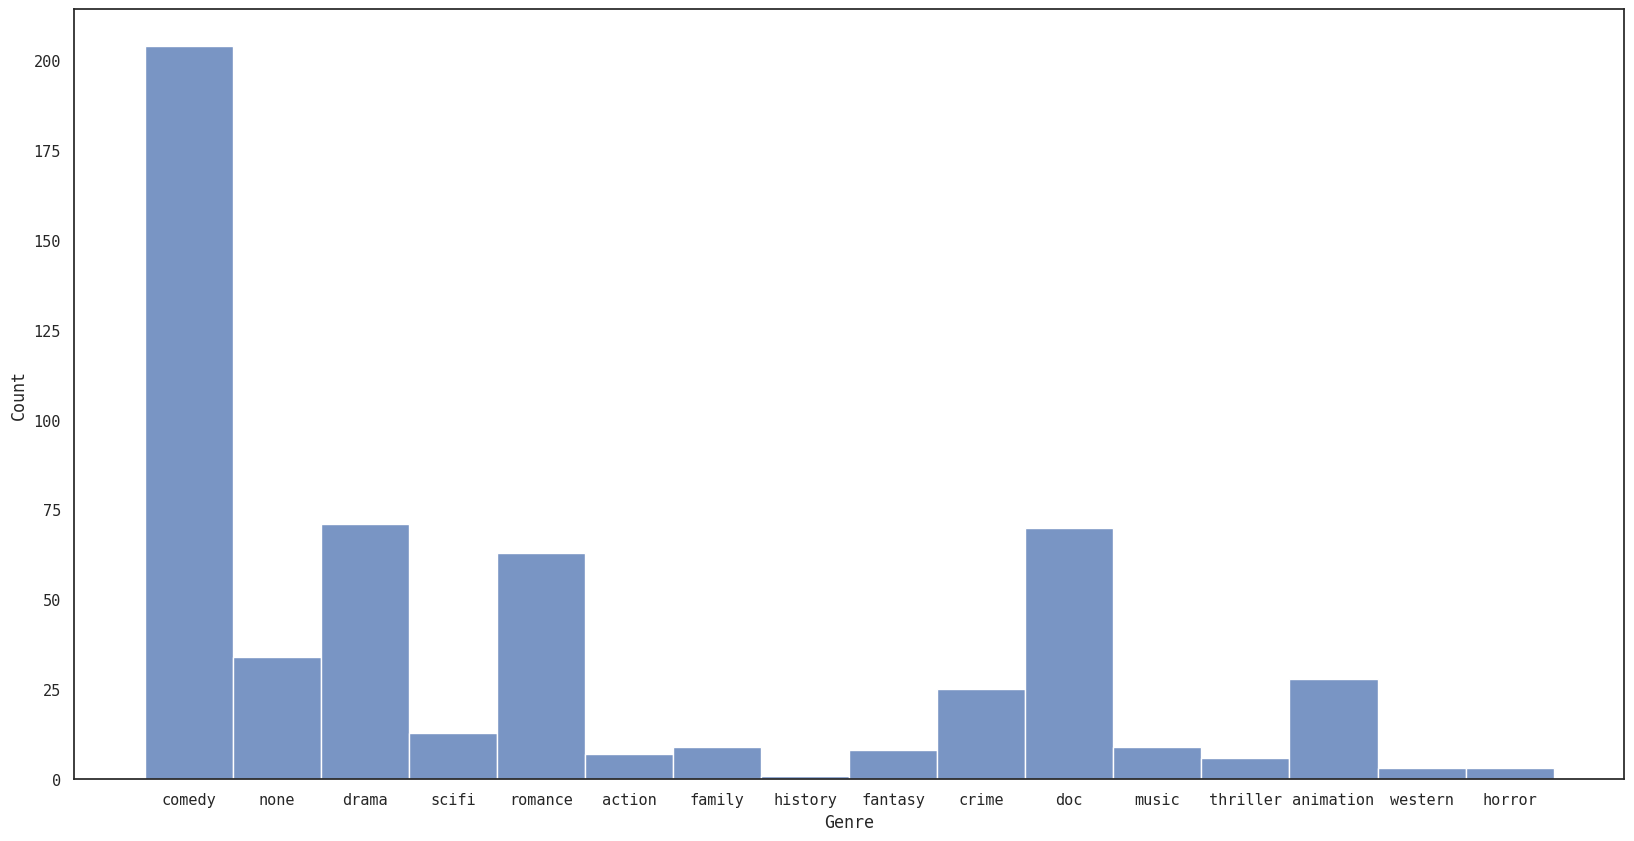

In [43]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

data_combined.Genre.replace(to_replace='documentation', value='doc', inplace=True)
plt.figure(figsize=(20,10))
sns.histplot(data_combined.Genre)

In [44]:
data_combined.head()

,Title,Date Watched,Streaming Service,Release Year,Age Certification,Runtime,Genres,Imdb Score,Month Watched,Year Watched,Genre
0,Dark Shadows,2022-10-19 19:51:00,Hulu,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0,comedy
1,Dark Shadows,2012-10-27 21:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0,comedy
2,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy
3,Dark Shadows,2012-11-04 03:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy
4,Dark Shadows,2012-11-04 04:00:00,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy


In [45]:
top_titles = data_combined.Title.value_counts().head()

top_titles

Jeff Dunham: Relative Disaster             30
Katt Williams: Great America               23
Pinkfong & Baby Shark's Space Adventure    13
Grey's Anatomy                             11
Someone Great                              10
Name: Title, dtype: int64

In [46]:
# convert series back to dataframe for visualisation 
titles_counts = pd.DataFrame({'Title': top_titles.index, 'counts': top_titles.values})

titles_counts

,Title,counts
0,Jeff Dunham: Relative Disaster,30
1,Katt Williams: Great America,23
2,Pinkfong & Baby Shark's Space Adventure,13
3,Grey's Anatomy,11
4,Someone Great,10


In [47]:
# Group the release year by decade
def get_decade(val):
    return int(str(val)[0:-1] + "0")

data_combined["Decade"] = data_combined["Release Year"].map(get_decade)
data_combined["Decade"].value_counts()

2010    310
2020    193
2000     32
1990     18
1950      1
Name: Decade, dtype: int64

In [48]:
data_combined["Date Watched"] = pd.to_datetime(data_combined["Date Watched"], utc=True)

In [49]:
data_combined = data_combined.set_index("Date Watched")

In [50]:
data_combined.index = data_combined.index.tz_convert('America/New_York')

In [51]:
data_combined = data_combined.reset_index()

In [52]:
data_combined["Day Watched"] = data_combined["Date Watched"].dt.weekday
data_combined["Hour Watched"] = data_combined["Date Watched"].dt.hour

In [53]:
data_combined.head()

,Date Watched,Title,Streaming Service,Release Year,Age Certification,Runtime,Genres,Imdb Score,Month Watched,Year Watched,Genre,Decade,Day Watched,Hour Watched
0,2022-10-19 15:51:00-04:00,Dark Shadows,Hulu,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0,comedy,2010,2.0,15.0
1,2012-10-27 17:00:00-04:00,Dark Shadows,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0,comedy,2010,5.0,17.0
2,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,5.0,23.0
3,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,5.0,23.0
4,2012-11-04 00:00:00-04:00,Dark Shadows,Prime Video,2012,PG-13,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,comedy,2010,6.0,0.0


In [54]:
plt.figure(figsize=(25, 8))
sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 

x = topdf.titles
y = topdf.counts

# custom colours used as some titles will be reused in another graphic below
plt.bar(x, y, color=['black', 'green', 'maroon', 'blue', 'purple'])
# colours you can directly access within matplotlib: aqua, black, blue, fuchsia, gray, green, lime, maroon, navy, olive, purple, red, silver, teal, white, yellow 

plt.ylabel('Times watched')
plt.xlabel('Title')
plt.title('Top 5 rewatched films/episodes')
plt.xticks(topdf.titles, rotation = 3)

plt.show()
plt.clf()



NameError: name 'topdf' is not defined

<Figure size 2500x800 with 0 Axes>